In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [2]:

fashion_mnist = tf.keras.datasets.fashion_mnist #import data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #load data in variables

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] #types names


In [4]:
train_images.shape #formats data


(60000, 28, 28)

In [6]:
len(train_labels) #tags метки

60000

In [7]:
train_labels # тип метки

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape 

(10000, 28, 28)

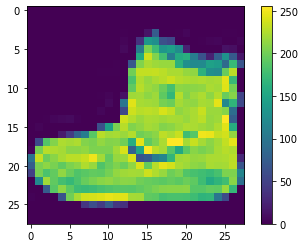

In [13]:
plt.figure()#предварительная обработка изображения

plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

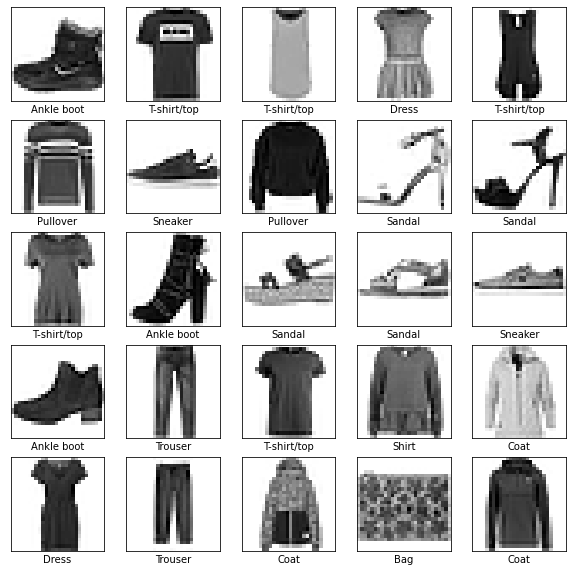

In [16]:
plt.figure(figsize=(10,10)) 
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #переформатирование картинок в одномерные масивы
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),#лосс точность или же показатели обучения
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4981 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3760 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3351 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3116 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 2s 949us/step - loss: 0.2944 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 2s 948us/step - loss: 0.2784 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 2s 981us/step - loss: 0.2677 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 2s 961us/step - loss: 0.2572 - accuracy: 0.9030
Epoch 9/10
1875/1875 [==============================] - 2s 956us/step - loss: 0.2471 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 2s 948us/step -

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3348 - accuracy: 0.8818 - 415ms/epoch - 1ms/step

Test accuracy: 0.8817999958992004


In [21]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()]) #softmax для преобразования линейных выходных данных модели — логитов — в вероятности, которые должны быть легче интерпретировать

In [22]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 751us/step


In [23]:
predictions[0]

array([4.2044390e-09, 7.4531464e-11, 1.7713399e-09, 2.1651069e-12,
       1.2995333e-10, 8.9372467e-04, 4.7338415e-07, 1.8369058e-02,
       2.2235365e-07, 9.8073649e-01], dtype=float32)

In [24]:
np.argmax(predictions[0]) #какая метка имеет наивысшее значение достоверности:

9

In [25]:
test_labels[0]

9

In [29]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



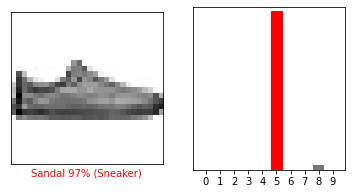

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

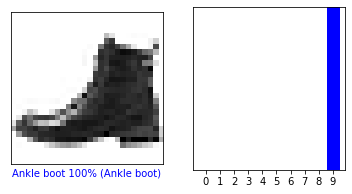

In [71]:
i = 234
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

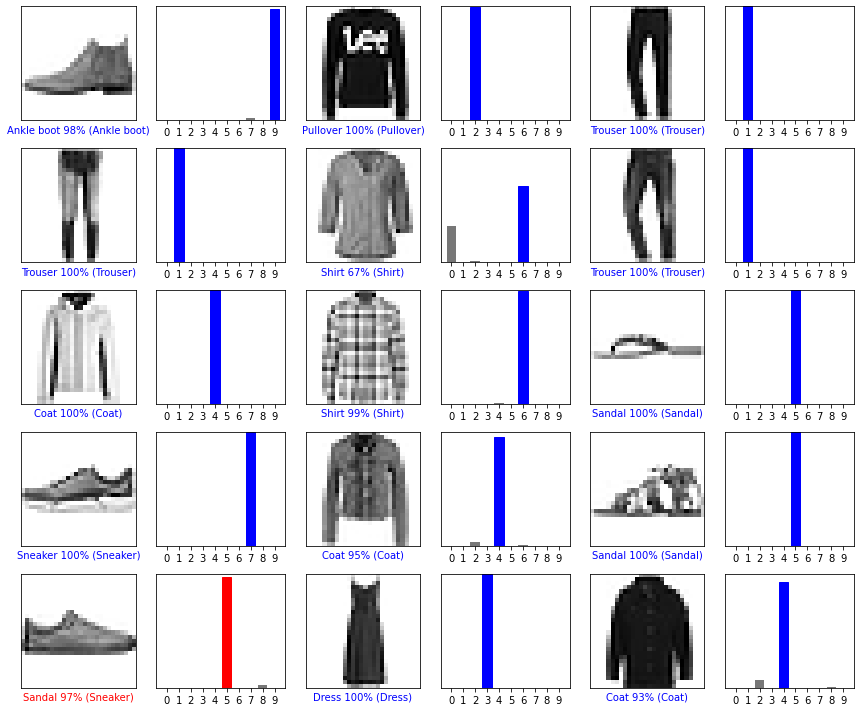

In [39]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [80]:
img = test_images[234]

print(img.shape)

(28, 28)


In [81]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 21ms/step
[[1.4150438e-11 1.2437025e-13 1.9005317e-15 1.7674447e-14 4.2082863e-15
  2.5710889e-09 3.7614866e-14 5.1509811e-05 4.9267305e-14 9.9994850e-01]]


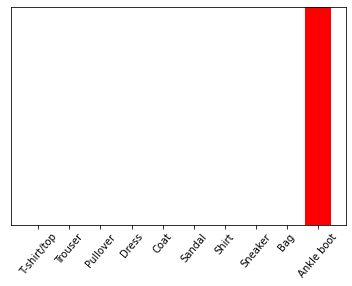

In [84]:

plot_value_array(1, predictions_single[0], test_labels)

_ = plt.xticks(range(10), class_names, rotation=50)
plt.show()